
# Project: Movie data analysis 

## Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions


## Introduction

> In this section of report, I will analyze the movie data. I am interested in knowing the following questions.
1. Which genres are most popular from year to year? 
2. What kinds of properties are associated with movies that have high revenues? Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?

> My analysis will help me to answer these question through using Python.

## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Reading the CSV file into a DataFrame
df = pd.read_csv("tmdb_movies_data.csv")

# Displaying the first few rows of the DataFrame
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [2]:
#Firstly, we need to split the genres into different columns to be able to analyze later
df['genre_1'] = df.genres.str.split('|').str.get(0)
df['genre_2'] = df.genres.str.split('|').str.get(1)
df['genre_3'] = df.genres.str.split('|').str.get(2)
df['genre_4'] = df.genres.str.split('|').str.get(3)
#let us check the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## CLEAN THE DATA

In [3]:
#Drop the columns that i will not use
df.drop(['id','imdb_id', 'cast','homepage','tagline','keywords','overview','runtime'], axis=1, inplace=True)

In [6]:
#check what are the films without genres, then drop the rows of films without genre.
df[df.genre_1.isnull()]

,popularity,budget,revenue,original_title,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4
424,0.244648,0,0,Belli di papÃ,Guido Chiesa,NaN,NaN,10/29/2015,21,6.1,2015,0.00000,0.0,NaN,NaN,NaN,NaN
620,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,Ruthless Pictures|Hollywood Shorts,10/6/2015,13,5.0,2015,0.00000,0.0,NaN,NaN,NaN,NaN
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,NaN,NaN,10/3/2014,13,6.8,2014,0.00000,0.0,NaN,NaN,NaN,NaN
1712,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,NaN,Daniel Sladek Entertainment,2/27/2009,57,7.4,2009,0.00000,0.0,NaN,NaN,NaN,NaN
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,NaN,NaN,2/27/2009,11,7.0,2009,0.00000,0.0,NaN,NaN,NaN,NaN
2370,0.081892,0,0,Freshman Father,Michael Scott,NaN,NaN,6/5/2010,12,5.8,2010,0.00000,0.0,NaN,NaN,NaN,NaN
2376,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,NaN,NaN,12/25/2010,11,7.7,2010,0.00000,0.0,NaN,NaN,NaN,NaN
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,NaN,NaN,2/2/2001,12,7.2,2001,0.00000,0.0,NaN,NaN,NaN,NaN
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,NaN,NaN,8/13/2008,11,6.1,2008,0.00000,0.0,NaN,NaN,NaN,NaN
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,NaN,BBC,7/27/2012,12,8.3,2012,0.00000,0.0,NaN,NaN,NaN,NaN


In [7]:
#Check again the informtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   release_date          10866 non-null  object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
 13  genre_1               10843 non-null  object 
 14  genre_2               8515 non-null   object 
 15  genre_3            

### Research Question 1:Which genres are most popular from year to year? 

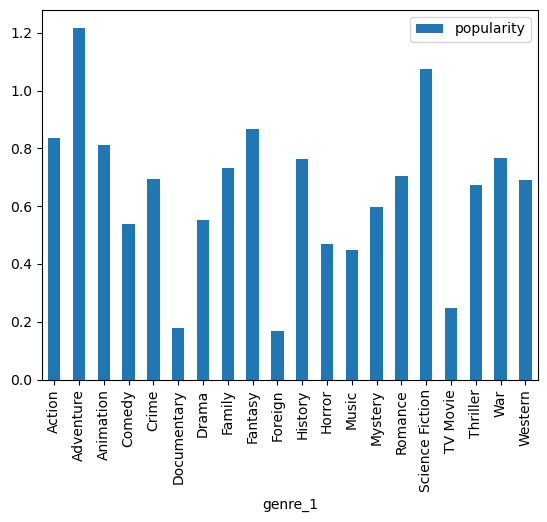

In [8]:
#Find the relationship between the first film genres and the popularity.
df.groupby('genre_1')['popularity'].mean().plot(kind='bar', label ="popularity")
#As you can see, the most popular films along the years are Adventure, Romance and Actions movies.
plt.legend()

### Insight from this plot: As you can see, the most popular films along the years are Adventure, Romance and Actions movies.

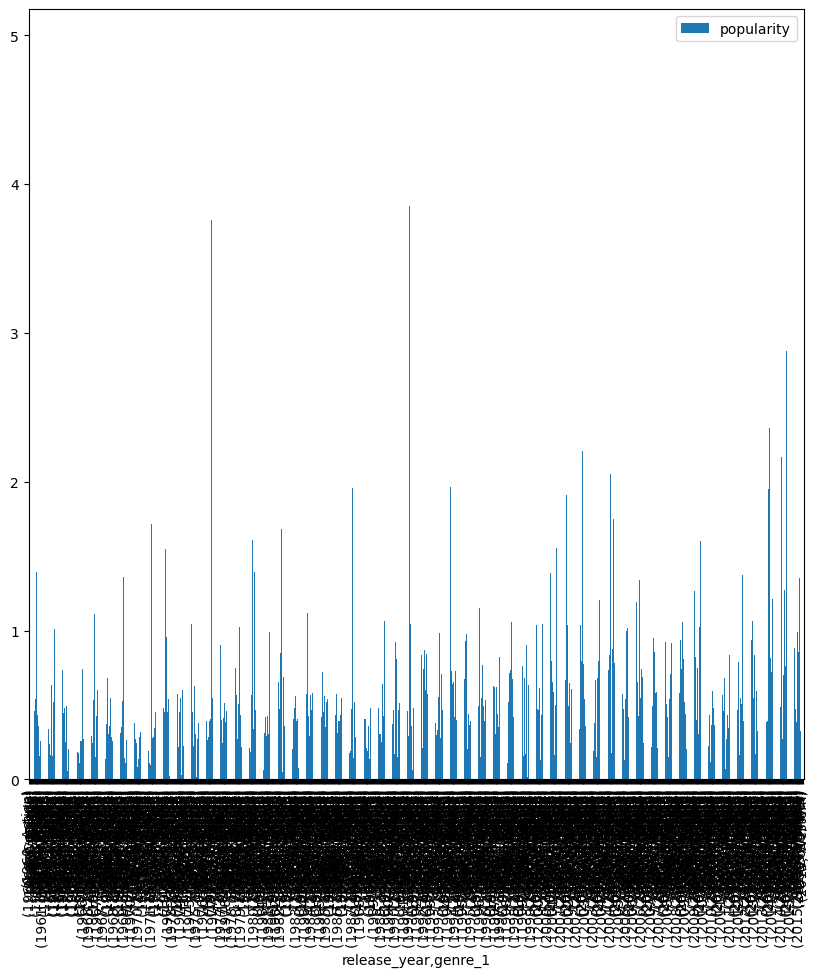

In [12]:
#let's check what are the most popular genre movies from year to year
df.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar',figsize=(10,10), label="popularity")
#Show the plot and see the relationship
plt.legend()

### As you can see from the graph, we have insert too many years in the dataset, is not clear to see the results and the relationship between years, genre and popularity. So we´d better only choose some certain years to analyze.

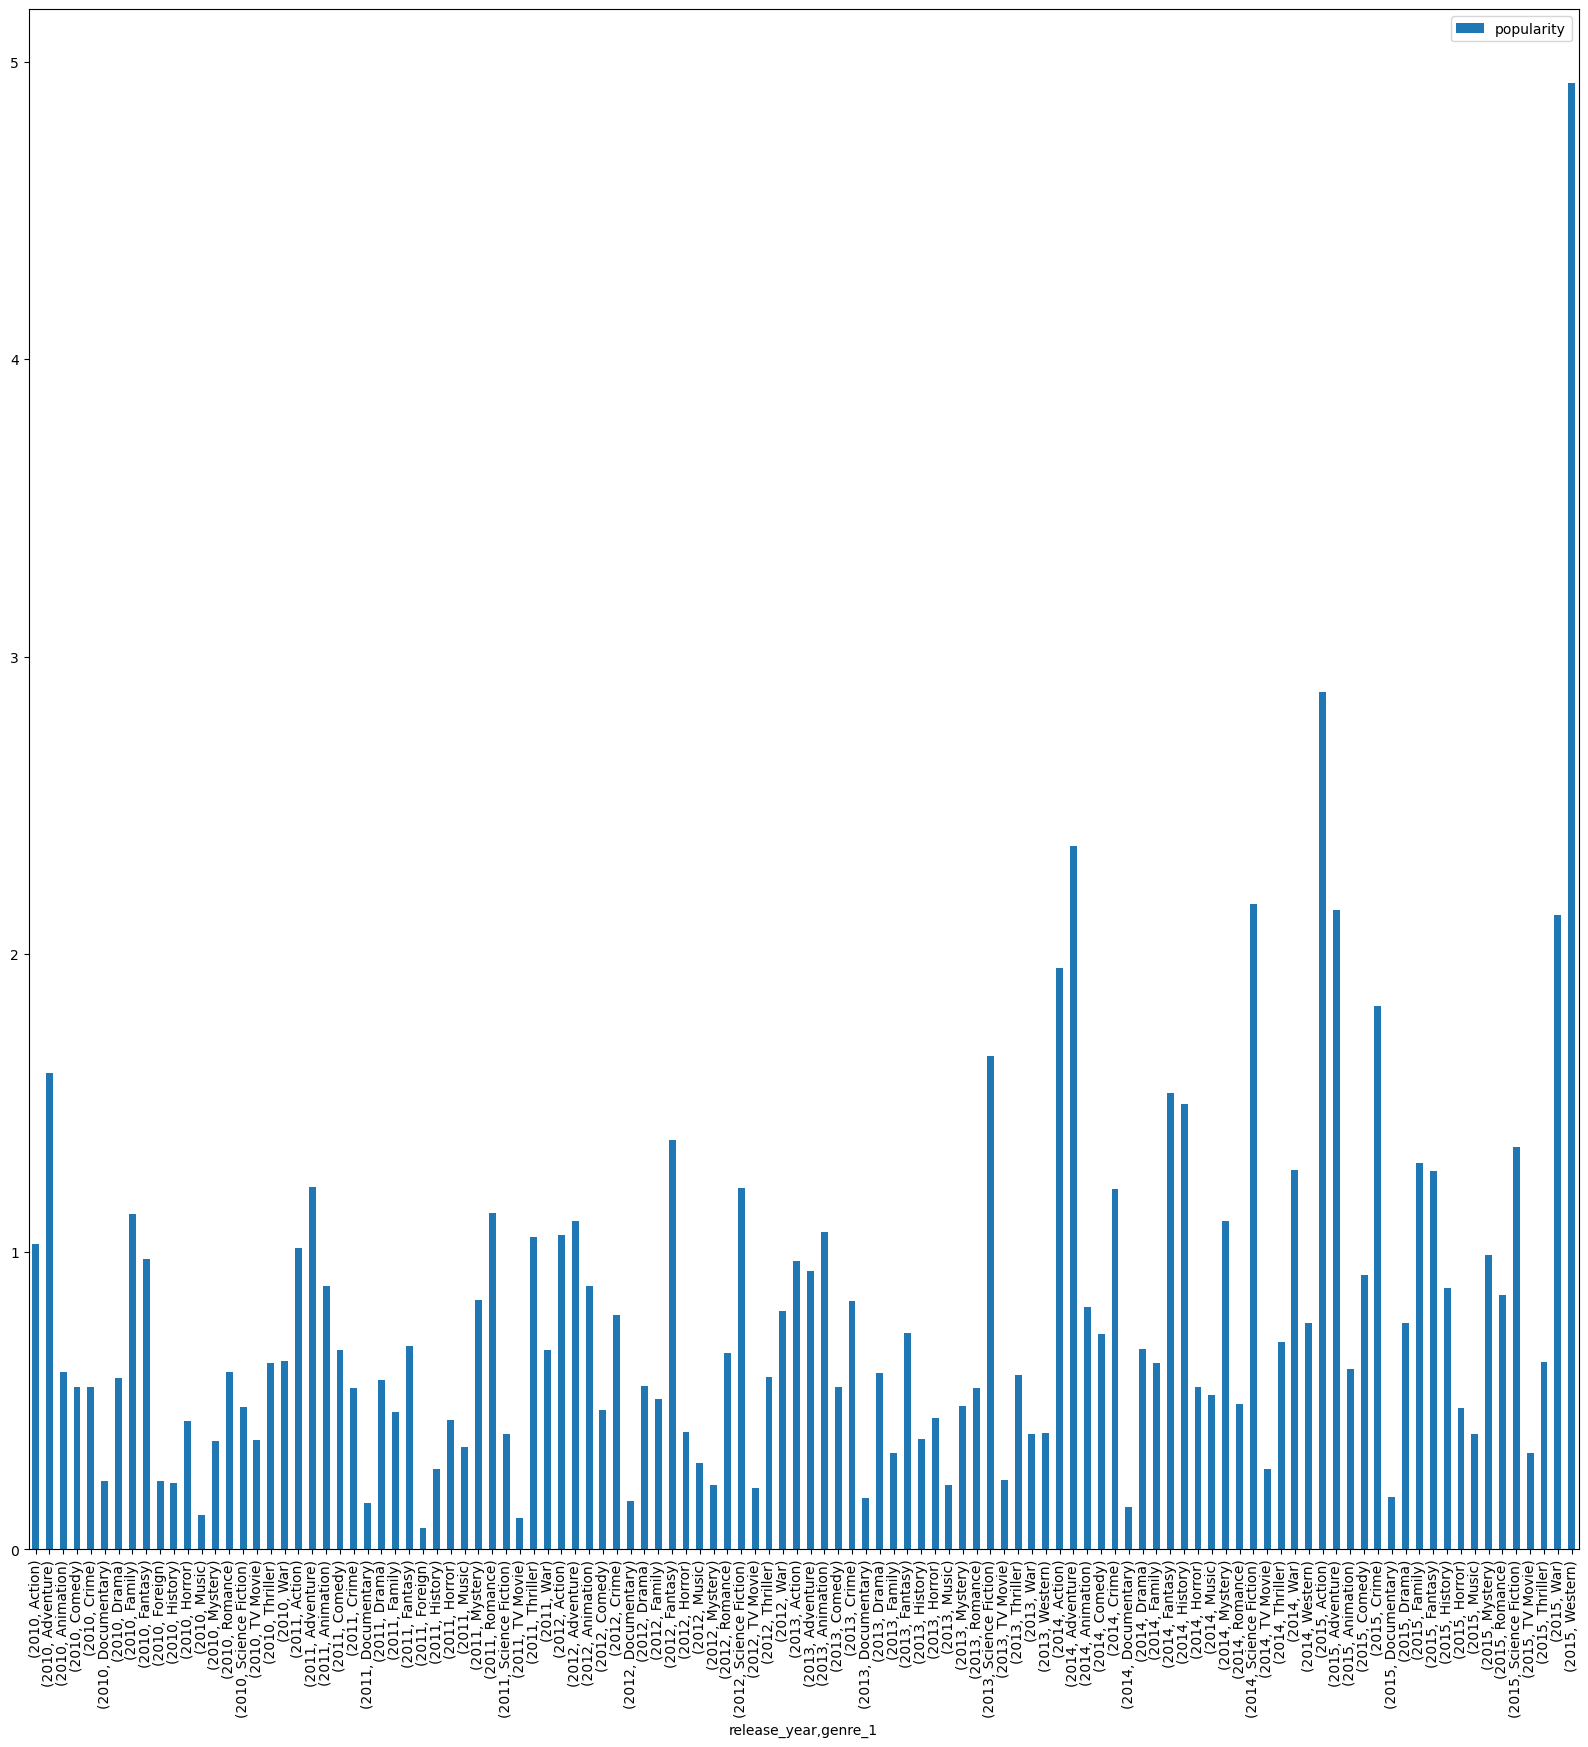

In [13]:
#So let´s choose the last 5 years to analyze, it is more feasible.
last_5_years = df[df['release_year'] >= 2010]
last_5_years.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar',figsize=(20,20), label="popularity")
plt.legend()

### We can see all the years along from 2010 to 2015 in the unique plot, we can see the tendency the popularity for all the genres is increasing, but we like to see more clear the most popular genre of file one year by one year.

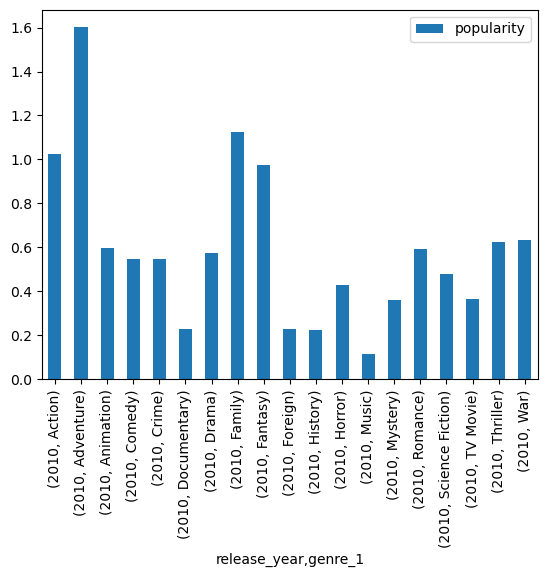

In [14]:
#Still not clear? let´s see the relationship between genre and popularity for every year then
year_2010 = df[df['release_year'] == 2010]
year_2011 = df[df['release_year'] == 2011]
year_2012 = df[df['release_year'] == 2012]
year_2013 = df[df['release_year'] == 2013]
year_2014 = df[df['release_year'] == 2014]
year_2015 = df[df['release_year'] == 2015]

year_2010.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar', label ="popularity")
plt.legend()
plt.show()

### Insight from this plot: as you can see the most popular genre in 2010 is Adventure

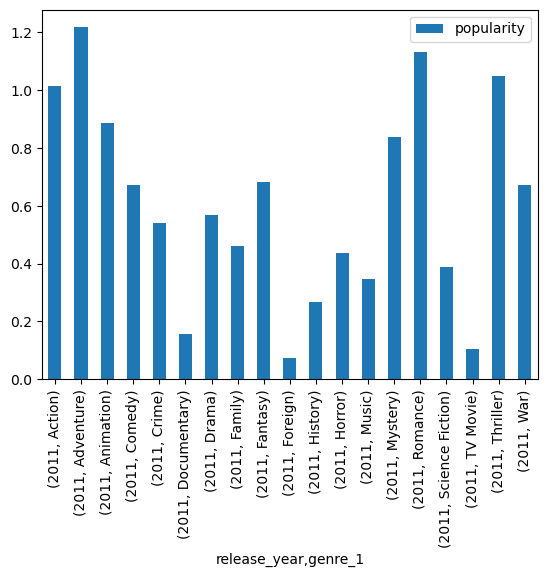

In [15]:
#Run the plot for the relatinship between genre and popularity in 2011
year_2011.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar', x=['genre_1'],y = ['popularity'])
plt.legend()

### In 2011, the most popular genre is adventure

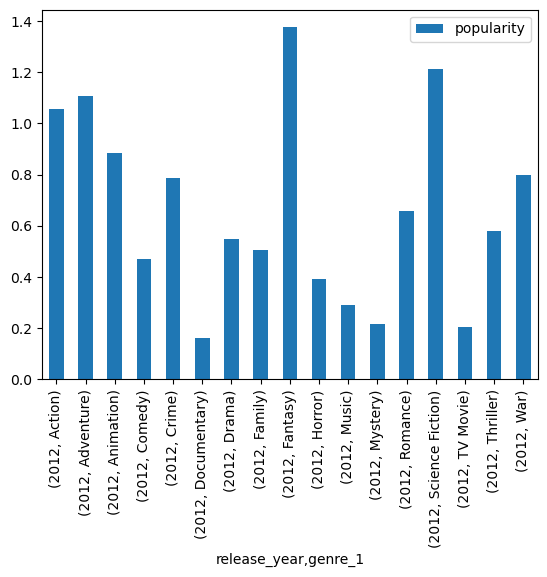

In [16]:
#Run the plot for the relatinship between genre and popularity in 2012
year_2012.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar', label = 'popularity')
plt.legend()

### But in 2012 the most popular genre is Fantasy

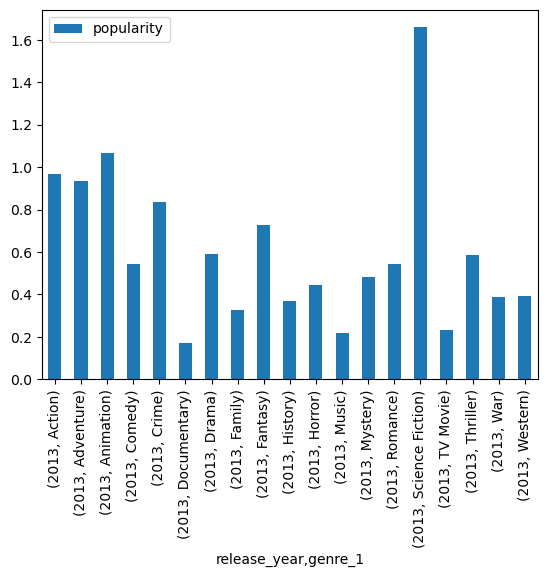

In [17]:
#Run the plot for the relatinship between genre and popularity in 2013
year_2013.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar', label = 'popularity')
plt.legend()

### In 2013, the most popular genre is science ficction

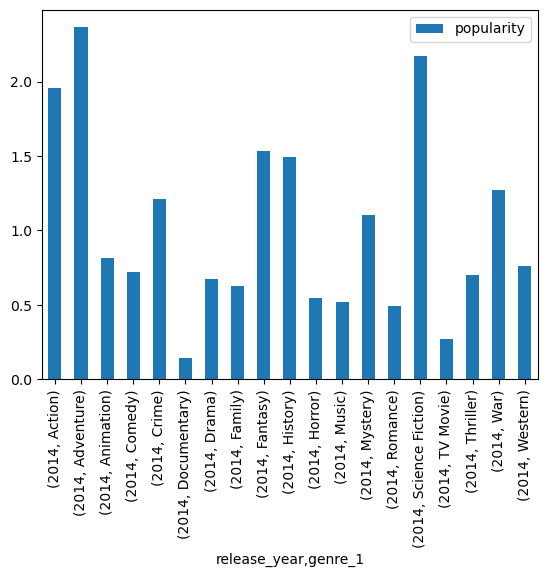

In [18]:
#Run the plot for the relatinship between genre and popularity in 2014
year_2014.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar', label = 'popularity')
plt.legend()

### In 2014, the most popular genre is still adventure

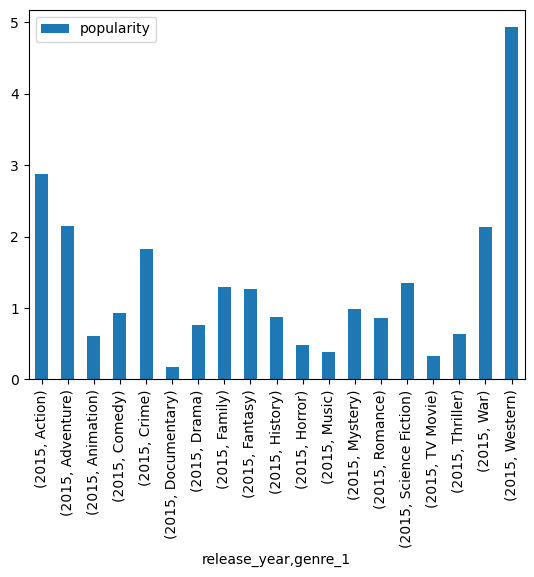

In [19]:
#Run the plot for the relatinship between genre and popularity in 2012
year_2015.groupby(['release_year','genre_1'])['popularity'].mean().plot(kind='bar', label = 'popularity')
plt.legend()

### In 2015, the most popular genre is Western

### Research Question 2:  What kinds of properties are associated with movies that have high revenues? Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?

In [20]:
#I will like to know firstly what movies have the most budget.
df[df['budget'].notnull()][['original_title','budget','revenue']].sort_values('budget',ascending=False).head(10)

,original_title,budget,revenue
2244,The Warrior's Way,425000000,11087569
3375,Pirates of the Caribbean: On Stranger Tides,380000000,1021683000
7387,Pirates of the Caribbean: At World's End,300000000,961000000
14,Avengers: Age of Ultron,280000000,1405035767
6570,Superman Returns,270000000,391081192
4411,John Carter,260000000,284139100
1929,Tangled,260000000,591794936
7394,Spider-Man 3,258000000,890871626
5508,The Lone Ranger,255000000,89289910
4367,The Hobbit: An Unexpected Journey,250000000,1017003568


### "The Warrior's Way", "Pirates of the Caribbean: On Stranger Tides", "Pirates of the Caribbean: At World's End", "Avengers: Age of Ultron", "Superman Returns" are the films with the highest budget.

In [21]:
#I will like to know what movies have the most revenue.
df[df['revenue'].notnull()][['original_title','budget','revenue']].sort_values('revenue',ascending=False).head(10)

,original_title,budget,revenue
1386,Avatar,237000000,2781505847
3,Star Wars: The Force Awakens,200000000,2068178225
5231,Titanic,200000000,1845034188
4361,The Avengers,220000000,1519557910
0,Jurassic World,150000000,1513528810
4,Furious 7,190000000,1506249360
14,Avengers: Age of Ultron,280000000,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,125000000,1327817822
5422,Frozen,150000000,1274219009
5425,Iron Man 3,200000000,1215439994


### But the highest revenue movies are "Avatar", "Star Wars: The Force Awakens", "Titanic", "The avengers". As we can see, the highest budget films did not have the highest revenue. And the highest revenue films are not the films with the higest budget. The budget is not the factor which associate with the higher revenue.

### Then let´s assume the average vote score will afect directly the revenue

In [22]:
#I will like to know what movies have the most budget.
df[df['vote_average'].notnull()][['original_title','vote_average','revenue']].sort_values('vote_average',ascending=False).head(20)

,original_title,vote_average,revenue
3894,The Story of Film: An Odyssey,9.2,0
538,The Mask You Live In,8.9,0
2269,Life Cycles,8.8,0
1200,Black Mirror: White Christmas,8.8,0
6911,Pink Floyd: Pulse,8.7,0
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,0
3690,The Art of Flight,8.5,0
8411,Queen - Rock Montreal,8.5,0
8221,A Personal Journey with Martin Scorsese Throug...,8.5,0
5830,Doctor Who: The Time of the Doctor,8.5,0


### The highest score movies go to "The Story of Film: An Odyssey", "The Mask You Live In", "Life Cycles", "Black Mirror: White Christmas", "Pink Floyd: Pulse".

In [23]:
#Let´s try to see how is the revenue related to the vote average score
df[df['revenue'].notnull()][['original_title','vote_average','revenue']].sort_values('revenue',ascending=False).head(10)

,original_title,vote_average,revenue
1386,Avatar,7.1,2781505847
3,Star Wars: The Force Awakens,7.5,2068178225
5231,Titanic,7.3,1845034188
4361,The Avengers,7.3,1519557910
0,Jurassic World,6.5,1513528810
4,Furious 7,7.3,1506249360
14,Avengers: Age of Ultron,7.4,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,7.7,1327817822
5422,Frozen,7.5,1274219009
5425,Iron Man 3,6.9,1215439994


### As you can see, the vote average score does not affect directly the revenue neither

### Then let´s assume the film genre and the popularity will affect the revenue?

In [24]:
#We need to know the relationship between the popularity and revenue, well, maybe also the genre
df[df['popularity'].notnull()][['genre_1','popularity','revenue']].sort_values('popularity',ascending=False).head(20)

,genre_1,popularity,revenue
0,Action,32.985763,1513528810
1,Action,28.419936,378436354
629,Adventure,24.949134,621752480
630,Action,14.311205,773312399
2,Adventure,13.112507,295238201
631,Action,12.971027,714766572
1329,Adventure,12.037933,775398007
632,Action,11.422751,78739897
3,Action,11.173104,2068178225
633,Science Fiction,10.739009,752100229


### We cannot see directly from this table list, let´s try another way.

<Axes: xlabel='popularity', ylabel='revenue'>

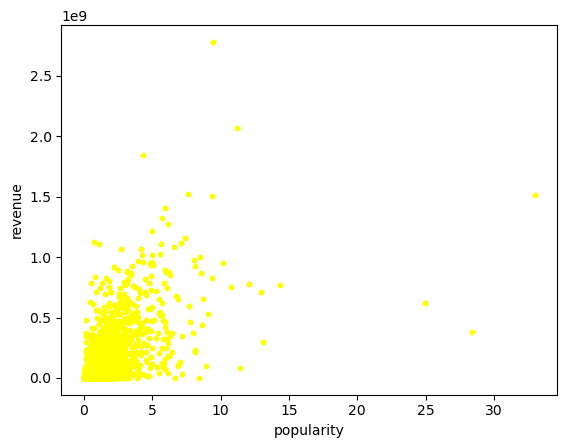

In [26]:
#let´s see the relationship between popularity and revenue more clearly in graph
df.plot.scatter('popularity', 'revenue', s=10, c='yellow')

### As you can see, the popularity is higher the revenue is higher, so this is the factor affect the revenue.

<a id='conclusions'></a>
## Conclusions

> From the analysis I have done, we have solved two questions. 1. What are the most popular genre of movies from years to years. 2. What are the factores affect the revenue.Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?
>I have chose the last 5 years to see more clear the most popular genre. The conclusion are below:

>In 2011, the most popular genre is adventure

>In 2012 the most popular genre is Fantasy

>In 2013, the most popular genre is science ficction

>In 2014, the most popular genre is still adventure

>In 2015, the most popular genre is Western

> The answer for the second question is: The budget and voted score do not affect directly to the revenue. The factor which affect the revenue is the popularity. As you can see in the plot and the analysis before.

### Limitations:

> During my analysis, i actually met some limitations. There are many nulls and 0 values which become the obstacles in my analysis, for example when i tried to analyze the the relationship between the revenue and the voted score, the revenue showed all 0. I will need to drop all the value 0. And also there are many null values in the columns, also i droped them.

> Another limitation is for example in the columna "Cast" and "Genres" contains more than one value. I will need to split them into differents columnas. 



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!